In [31]:
from maze_visualizer import *

In [32]:
def dfs(maze, start, goal):
    # Stack for DFS
    stack = [(start, [start])]

    while stack:
        (vertex, path) = stack.pop()

        # Generate neighbors for current vertex, avoiding already visited nodes in the path
        for next in neighbors(maze, vertex):
            if next in path:
                continue

            if next == goal:
                # Return the path if the goal is found
                return path + [next]

            stack.append((next, path + [next]))

    return None

# Helper function to generate neighbors
def neighbors(maze, current):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    (x, y) = current
    result = []

    for dx, dy in directions:
        nx, ny = x + dx, y + dy

        # Check if the neighbor is within the maze and not a wall
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
            result.append((nx, ny))

    return result

def find_all_foods_dfs(maze, start, foods):
    paths = []
    current_position = start

    for food in foods:
        path_to_food = dfs(maze, current_position, food)

        if path_to_food:
            paths.append(path_to_food)
            current_position = food

    return paths

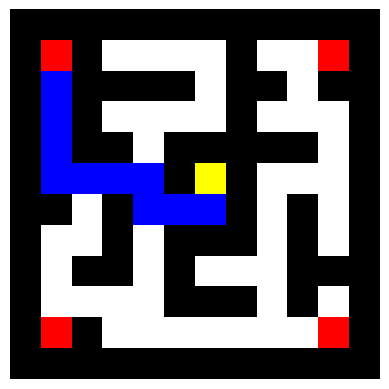

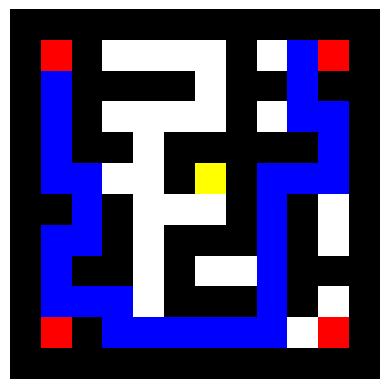

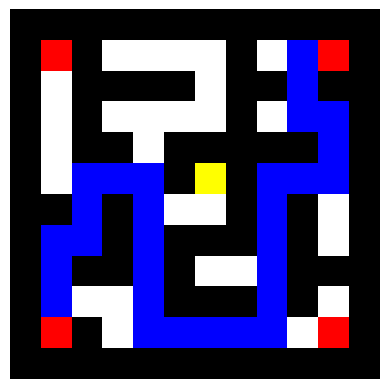

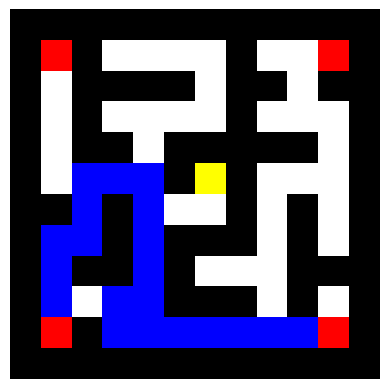

In [34]:
start_point = (5, 6)
corner_foods = [(1, 1), (1, len(sample_maze[0]) - 2), (len(sample_maze) - 2, 1), (len(sample_maze) - 2, len(sample_maze[0]) - 2)]
eaten_foods = []

dfs_path = find_all_foods_dfs(sample_maze, start_point, corner_foods)

for path in dfs_path:
    show_maze(sample_maze, start_point, path)